In [1]:
import json

from branca.colormap import linear
import folium
from folium import Map, Marker, GeoJson, LayerControl
import pandas as pd
import geopandas as gpd

%matplotlib inline

## Load shapefile

In [2]:
shapefile_path = "shapefiles/2020/tl_2020_11_tract.shp"

In [3]:
gdf = gpd.read_file(shapefile_path)

<AxesSubplot:>

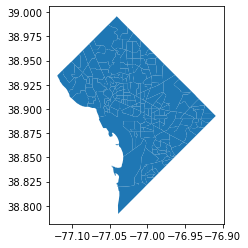

In [4]:
gdf.plot()

In [244]:
gdf.to_file('shapefiles/dc_census_tracts.json', driver='GeoJSON')

In [5]:
gj_path = 'shapefiles/dc_census_tracts.json'
geojson = gpd.read_file(gj_path)

In [6]:
def embed_map(m):
    from IPython.display import IFrame

    m.save('inline_map.html')
    return IFrame('inline_map.html', width='100%', height='750px')

## Load datasets

In [7]:
demo_df = pd.read_csv("data/redistricting_census_tracts_2020.csv")
housing_df = pd.read_csv("data/housing_characteristics.csv")

In [8]:
print("Shapefile dimensions:", geojson.shape)
print("Demographics dimensions:", demo_df.shape)
print("Housing dimensions:", housing_df.shape)

Shapefile dimensions: (206, 13)
Demographics dimensions: (206, 315)
Housing dimensions: (179, 147)


In [249]:
demo_df.shape

(206, 315)

In [107]:
list(demo_df.columns)

['Area Name-Legal/Statistical Area Description (LSAD) Term-Part Indicator',
 '18+ Pop 1 race: American Indian Alaskan',
 '18+ Pop 1 race: Asian',
 '18+ Pop 1 race: Black',
 '18+ Pop 1 race: Native Hawaiian Pacific Islander',
 '18+ Pop 1 race: Other race',
 '18+ Pop 1 race: White',
 'Area Land',
 'Area Water',
 'Geographic Code Identifier',
 'GEOID',
 'Hispanic 18+ Pop',
 'Housing Unit Count (100%)',
 'Non-Minority 18+ Pop (White Non-Hispanic)',
 'Not Hispanic 18+ Pop 1 race: American Indian Alaskan',
 'Not Hispanic 18+ Pop 1 race: Asian',
 'Not Hispanic 18+ Pop 1 race: Black',
 'Not Hispanic 18+ Pop 1 race: Native Hawaiian Pacific Islander',
 'Not Hispanic 18+ Pop 1 race: Other race',
 'Not Hispanic Pop of 1 race: American Indian Alaskan',
 'Not Hispanic Pop of 1 race: Asian',
 'Not Hispanic Pop of 1 race: Black',
 'Not Hispanic Pop of 1 race: Native Hawaiian Pacific Islander',
 'Not Hispanic Pop of 1 race: Other Race',
 'Occupied Housing Units',
 'Pop of 1 race: American Indian Alaska

In [108]:
print(demo_df['Tract Number'][0])
print(demo_df['GEOID'][0])
print(demo_df['Geographic Code Identifier'][0])

101
11001000101
11001000101


In [109]:
demo_df['GEOID'].head()

0    11001000101
1    11001000102
2    11001000201
3    11001000202
4    11001000300
Name: GEOID, dtype: int64

In [110]:
demo_df['GEOID'].nunique()

206

In [12]:
demo_df_small = demo_df[['GEOID',
                         'Hispanic 18+ Pop',
                         '18+ Pop 1 race: Asian',
                         '18+ Pop 1 race: Black',
                         '18+ Pop 1 race: White',
                         'Total Housing Units',
                         'Occupied Housing Units',
                         'Vacant Housing Units',
                        ]]

In [256]:
demo_df_small.head()

,GEOID,Hispanic 18+ Pop,18+ Pop 1 race: Asian,18+ Pop 1 race: Black,18+ Pop 1 race: White,Total Housing Units,Occupied Housing Units,Vacant Housing Units
0,11001000101,123,90,39,1005,999,865,134
1,11001000102,248,161,53,2427,2053,1724,329
2,11001000201,435,624,346,2535,11,11,0
3,11001000202,313,380,182,3236,2169,1814,355
4,11001000300,442,433,223,3861,2845,2634,211


In [260]:
list(housing_df.columns) 

['Census Tract',
 'Area Land',
 'Area Water',
 'BEDROOMS: Total housing units',
 'BEDROOMS: Total housing units: 1 bedroom',
 'BEDROOMS: Total housing units: 2 bedrooms',
 'BEDROOMS: Total housing units: 3 bedrooms',
 'BEDROOMS: Total housing units: 4 bedrooms',
 'BEDROOMS: Total housing units: 5 or more bedrooms',
 'BEDROOMS: Total housing units: No bedroom',
 'GEO Identifier',
 'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed)',
 'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 15.0 to 19.9 percent',
 'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 20.0 to 24.9 percent',
 'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 25.0 to 29.9 percent',
 'GROSS 

In [261]:
housing_df['GEO Identifier'].head()

0    11001000100
1    11001000201
2    11001000202
3    11001000300
4    11001000400
Name: GEO Identifier, dtype: int64

In [262]:
housing_df.shape

(179, 147)

In [263]:
housing_df['GEO Identifier'].nunique()

179

In [9]:
housing_df_small = housing_df[['GEO Identifier',
                               'GROSS RENT: Occupied units paying rent: Median (dollars)',
                               'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 35.0 percent or more',
                               'HOUSING TENURE: Occupied housing units: Average household size of owner-occupied unit',
                               'HOUSING TENURE: Occupied housing units: Average household size of renter-occupied unit',
                               'HOUSING TENURE: Occupied housing units: Owner-occupied',
                               'HOUSING TENURE: Occupied housing units: Renter-occupied',
                               'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI): Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed): 35.0 percent or more',
                               'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI): Housing units with a mortgage (excluding units where SMOCAPI cannot be computed): 35.0 percent or more',
                               'VALUE: Owner-occupied units: Median (dollars)',
                               'YEAR HOUSEHOLDER MOVED INTO UNIT: Occupied housing units: Moved in 2017 or later',
                              ]]

In [10]:
housing_df_small = housing_df_small.rename(columns={'GEO Identifier': 'GEOID'})

In [13]:
joined_df = demo_df_small.merge(housing_df_small, how="left", on="GEOID")
joined_df.shape

(206, 18)

In [121]:
joined_df.columns

Index(['GEOID', 'Hispanic 18+ Pop', '18+ Pop 1 race: Asian',
       '18+ Pop 1 race: Black', '18+ Pop 1 race: White', 'Total Housing Units',
       'Occupied Housing Units', 'Vacant Housing Units',
       'GROSS RENT: Occupied units paying rent: Median (dollars)',
       'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 35.0 percent or more',
       'HOUSING TENURE: Occupied housing units: Average household size of owner-occupied unit',
       'HOUSING TENURE: Occupied housing units: Average household size of renter-occupied unit',
       'HOUSING TENURE: Occupied housing units: Owner-occupied',
       'HOUSING TENURE: Occupied housing units: Renter-occupied',
       'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI): Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed): 35.0 percent or more',
       'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF 

In [14]:
joined_df['GEOID'] = joined_df.GEOID.astype(str)

In [15]:
gj_data = geojson.merge(joined_df, how="left", on="GEOID")

## Construct map

In [179]:
def make_map(layers: dict):
    m = Map(location = (38.8899, -77.0091),
            zoom_start = 12,
            tiles = 'Stamen Toner',
           )
    for layer in layers:
        c = folium.Choropleth(
            geo_data=gj_path,
            data=gj_data,
            columns=['GEOID', layer],
            key_on='feature.properties.GEOID',
            fill_color=layers[layer][1],
            fill_opacity=layers[layer][2],
            nan_fill_opacity=0,
            line_opacity=1,  
            highlight=True,
            overlay=True,
            name=layers[layer][0],
            legend_name=layers[layer][0],
        )
        
        for key in c._children:
            if key.startswith('color_map'):
                del(c._children[key])
        
        c.add_to(m)
    LayerControl().add_to(m)    
    return m

In [183]:
layers = {
    #'Total Housing Units': ('Total Housing Units', 'Blues', 0.5),
    #'Vacant Housing Units': ('Vacant Housing Units', 'GnBu', 0.5),
    #'HOUSING TENURE: Occupied housing units: Renter-occupied': ('Renter-occupied Units', 'Greens', 0.5),
    #'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI): Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed): 35.0 percent or more': ('SMOCAPI no mortgage', 'YlOrBr', 0.5),
    #'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI): Housing units with a mortgage (excluding units where SMOCAPI cannot be computed): 35.0 percent or more': ('SMOCAPI with mortgage', 'YlOrBr', 0.5),
    #'VALUE: Owner-occupied units: Median (dollars)': ('Median Value', 'Greens', 0.7),
    #'YEAR HOUSEHOLDER MOVED INTO UNIT: Occupied housing units: Moved in 2017 or later': ('Moved in last 5 years', 'OrRd', 0.5),
    #'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI): Occupied units paying rent (excluding units where GRAPI cannot be computed): 35.0 percent or more': ('GRAPI', 'OrRd', 0.7),
    #'GROSS RENT: Occupied units paying rent: Median (dollars)': ('Median Gross Rent', 'RdPu', 0.7),
    #'18+ Pop 1 race: White': ('White 18+', 'RdPu', 0.7),
    #'18+ Pop 1 race: Black': ('Black 18+', 'RdPu', 0.7),
    '18+ Pop 1 race: Asian': ('Asian 18+', 'RdPu', 0.7),
    #'Hispanic 18+ Pop': ('Hispanic 18+', 'RdPu', 0.7),
}

In [184]:
m = make_map(layers)

In [182]:
save_map(m, 'median_gross_rent+GRAPI')

In [185]:
embed_map(m)

In [99]:
import os
import time
from selenium import webdriver

In [100]:
def save_map(m, name):
    delay=5
 
    #Save the map as an HTML file
    fout='output.html'
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fout)
    m.save(fout)
 
    #Open a browser window...
    browser = webdriver.Firefox()
    #..that displays the map...
    browser.get(tmpurl)
    #Give the map tiles some time to load
    time.sleep(delay)
    #Grab the screenshot
    browser.save_screenshot('maps/{name}.png'.format(name=name))
    #Close the browser
    browser.quit()
    return